# Porfolio 2
# IBM HR Analytics Employee Attrition & Performance
Reading Data frame from csv file format

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

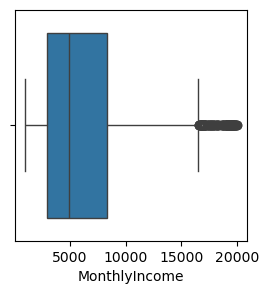

- Most employees earn relatively lower monthly incomes, while a smaller number earn substantially more.
- Half of employees earn below this value of median, and the income distribution is not symmetric.
- Income growth is nonlinear—pay increases sharply at higher job levels rather than gradually.
- Outliers are expected due to role and seniority differences.
- Outliers are retained as they reflect real organizational structure.

Attrition Distribution:
No:  1233 (83.88%)
Yes: 237 (16.12%)

 Overall Attrition Rate: 16.12%


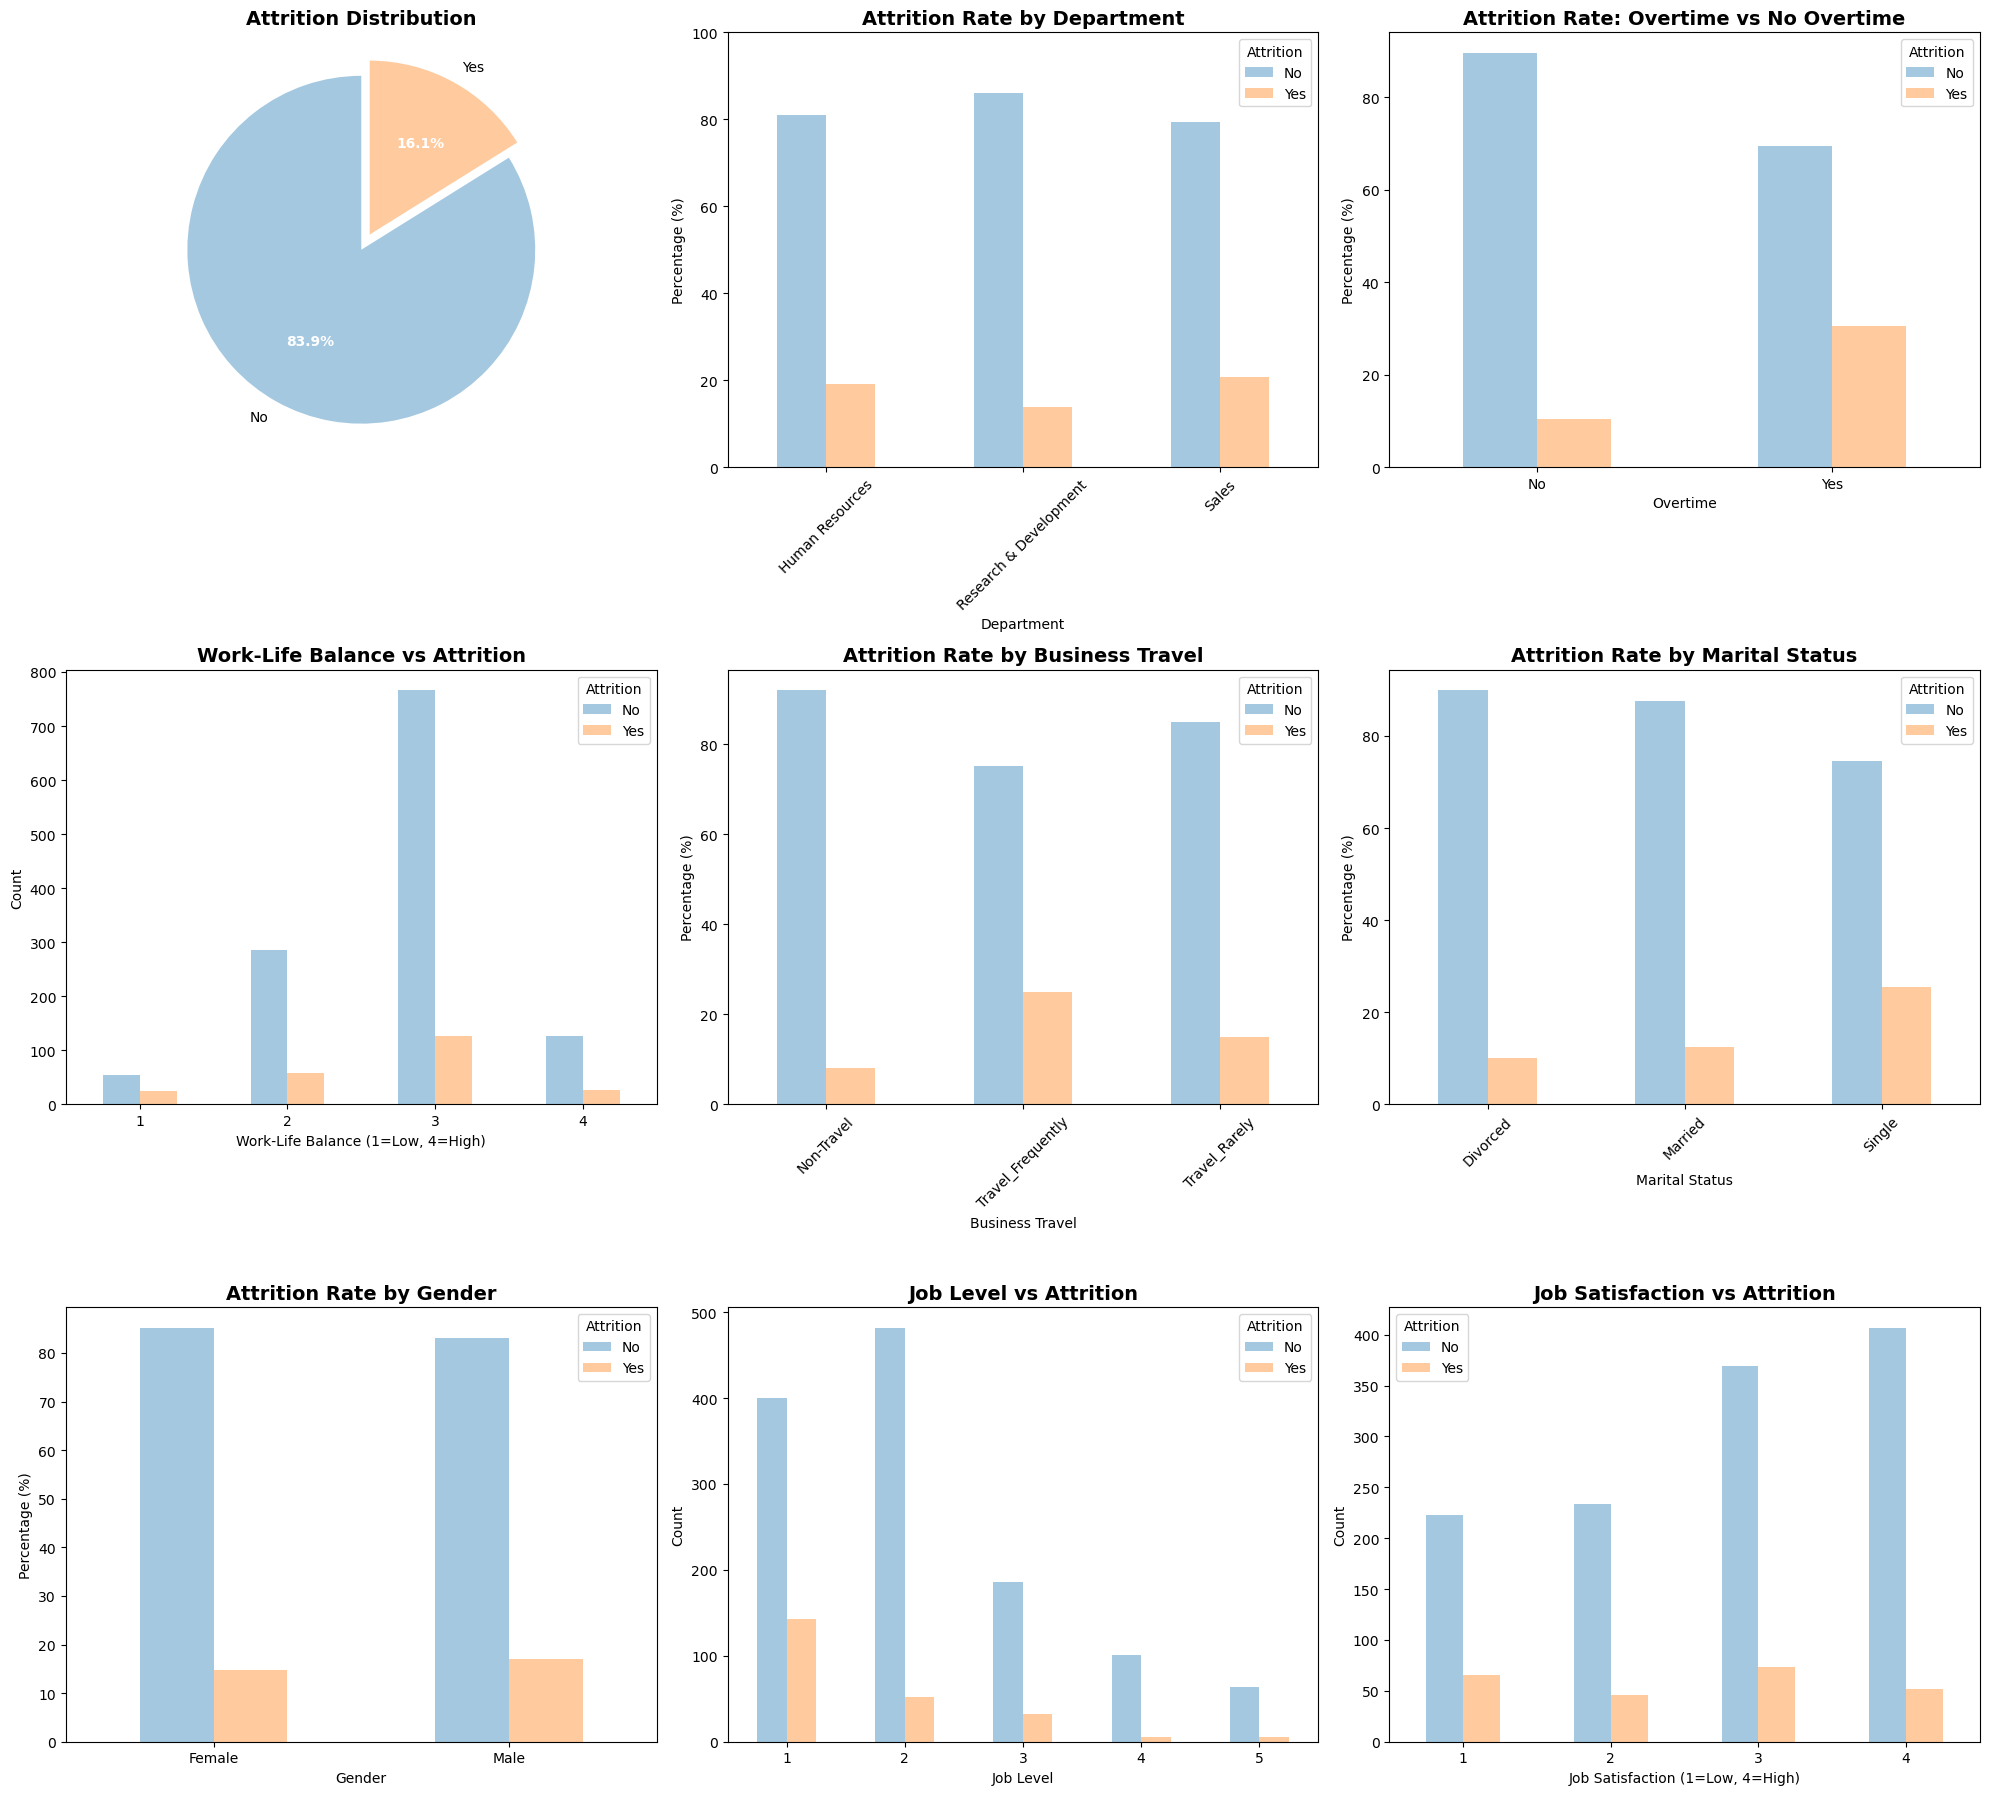


                                   Histogram                                    


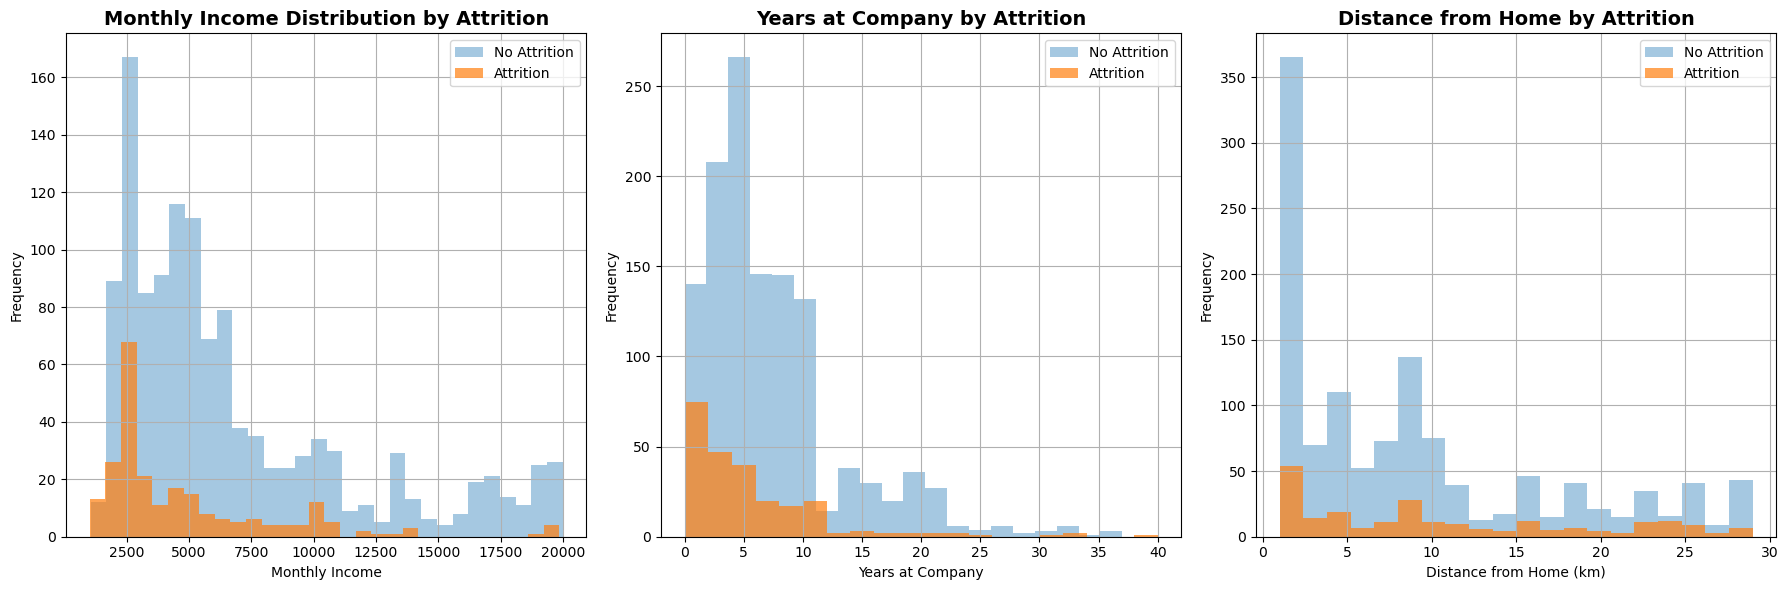

Employees with salaries below the average show higher attrition than those earning above the average.

                         Detailed statistical analysis                          


Comparison (Attrition: Yes vs No):
________________________________________________________________________________

Age:
  Attrition=Yes: 33.61
  Attrition=No:  37.56
  Difference:    -3.95 (-10.53%)

MonthlyIncome:
  Attrition=Yes: 4787.09
  Attrition=No:  6832.74
  Difference:    -2045.65 (-29.94%)

YearsAtCompany:
  Attrition=Yes: 5.13
  Attrition=No:  7.37
  Difference:    -2.24 (-30.37%)

TotalWorkingYears:
  Attrition=Yes: 8.24
  Attrition=No:  11.86
  Difference:    -3.62 (-30.50%)

YearsSinceLastPromotion:
  Attrition=Yes: 1.95
  Attrition=No:  2.23
  Difference:    -0.29 (-12.94%)

DistanceFromHome:
  Attrition=Yes: 10.63
  Attrition=No:  8.92
  Difference:    1.72 (+19.26%)

YearsWithCurrManager:
  Attrition=Yes: 2.85
  Attrition=No:  4.37
  Difference:    -1.52 (-34.69%)

                   

C:\Users\F\AppData\Local\Temp\ipykernel_10084\4003131411.py:549: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  job_role_attrition = df.groupby('JobRole').apply(


In [1]:
import pandas as pd

df = pd.read_csv('C:\data analyst\portfolio 2\HR\WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.head())

#------------------------------------
#  Data Cleaning
#------------------------------------

# Column till r5 rows for better understanding
print("="*80)
print("Understanding Columns for better analysis")
print("="*80)
pd.set_option('display.max_columns', None)
print(df.head())

# Checking column names for misspelling or any error
print("\n\n")
print("="*80)
print("Checking if column names are all correct")
print("="*80)
print(df.columns)

# Checking Data type and all basic info
print("\n\n")
print("="*80)
print("Columns Type / missing or null Values and basic info")
print("="*80)
df.head()
df.shape
df.info()

# Duplicate Values
print("\n\n")
print("="*80)
print("Duplicate Values")
print("="*80)
print(df.duplicated().sum())

#---------------------------------------------
#  To drop values
#---------------------------------------------
width = 80
print("\n"+"=" * width)
print("Checking and dropping unique values".center(width))
print("=" * width)
#---------------------------------------------
#  To check unique value 
#---------------------------------------------
print("\n")

print("Unique Values has been checked")

df.nunique().sort_values()

#---------------------------------------------
# To Drop Unique Values
#---------------------------------------------


print("Unique Value Column has been dropped")

df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

#---------------------------------------------
# Separating Categorical and Numerical data into two groups
#---------------------------------------------
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

width = 80
print("\n"+"=" * width)
print("Categorical Columns".center(width))
print("=" * width)

print(cat_cols)

width = 80
print("\n"+"=" * width)
print("Numerical Columns".center(width))
print("=" * width)

print(num_cols)

# Checking Categories for misspelling or inconsistency

width = 80
print("\n"+"=" * width)
print("Checking if there is error/misspell in Categories".center(width))
print("=" * width)
for col in cat_cols:
    print(col, df[col].unique())

#---------------------------------
#  Statistics Summary (Descriptive)
#---------------------------------
#To check the basic Statistics for outliers and statistical measures

#-------------------------------------
# Descriptive Statistics on Numerical Data
#-------------------------------------
width = 80
print("=" * width)
print("Numerical Data Summary".center(width))
print("=" * width)

print(df.describe())

#-------------------------------------
# Descriptive Statistics on Categorical Data
#-------------------------------------

width = 80
print("\n\n"+"=" * width)
print("Categorical Data Summary".center(width))
print("=" * width)
for col in cat_cols:
    print(f"\n")
    print(df[col].value_counts())

#----------------------------------------
#   OUTLIERS
#----------------------------------------
# checking outliers using IQR formula

width = 80
print("=" * width)
print("Outliers".center(width))
print("=" * width)

outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outlier_summary[col] = outliers.shape[0]

for col, count in outlier_summary.items():
    print(f"{col}: {count}")

#-----------------------------------------
#  Boxplot for Monthly Income
# just to see the outliers (Can see any variable outlier through this)

width = 80
print("\n"+"=" * width)
print("Boxplot for outlier".center(width))
print("=" * width)
print("Variable = Monthly Income")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))  
sns.boxplot(x=df['MonthlyIncome'])
plt.show()

print("- Most employees earn relatively lower monthly incomes, while a smaller number earn substantially more.")
print("- Half of employees earn below this value of median, and the income distribution is not symmetric.")
print("- Income growth is nonlinear—pay increases sharply at higher job levels rather than gradually.")
print("- Outliers are expected due to role and seniority differences.")
print("- Outliers are retained as they reflect real organizational structure.")

#-----------------------------------------------
#TARGET VARIABLE ANALYSIS (ATTRITION)
#-----------------------------------------------
attrition_counts = df['Attrition'].value_counts()
attrition_percent = df['Attrition'].value_counts(normalize=True) * 100

print("\nAttrition Distribution:")
print(f"No:  {attrition_counts['No']} ({attrition_percent['No']:.2f}%)")
print(f"Yes: {attrition_counts['Yes']} ({attrition_percent['Yes']:.2f}%)")

attrition_rate = (attrition_counts['Yes'] / len(df)) * 100
print(f"\n Overall Attrition Rate: {attrition_rate:.2f}%")


#---------------------------------------------------
#           Visualization
#---------------------------------------------------
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(20, 24))

#---------------------------------------------------
# 1. Pie Chart for Attrition
#---------------------------------------------------
ax1 = plt.subplot(4, 3, 1)


wedges, texts, autotexts = ax1.pie(
    attrition_counts,
    labels=['No', 'Yes'],
    wedgeprops={'alpha': 0.4},
    autopct='%1.1f%%',
    startangle=90,
    explode=[0, 0.1]
)

ax1.set_title('Attrition Distribution', fontsize=14, fontweight='bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

#---------------------------------------------------
# 2. Attrition Rate by Department
#---------------------------------------------------
ax2 = plt.subplot(4, 3, 2)

dept_attrition = pd.crosstab(
    df['Department'],
    df['Attrition'],
    normalize='index'
) * 100

dept_attrition.plot(kind='bar', ax=ax2, alpha=0.4)

ax2.set_title('Attrition Rate by Department', fontsize=14, fontweight='bold')
ax2.set_xlabel('Department', fontsize=10)
ax2.set_ylabel('Percentage (%)', fontsize=10)
ax2.legend(title='Attrition', labels=['No', 'Yes'])
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, 100)

#---------------------------------------------------
# 3. Attrition Rate: Overtime vs No Overtime
#---------------------------------------------------
ax3 = plt.subplot(4, 3, 3)

overtime_attrition = pd.crosstab(
    df['OverTime'],
    df['Attrition'],
    normalize='index'
) * 100

overtime_attrition.plot(kind='bar', ax=ax3, alpha=0.4)

ax3.set_title('Attrition Rate: Overtime vs No Overtime', fontsize=14, fontweight='bold')
ax3.set_xlabel('Overtime', fontsize=10)
ax3.set_ylabel('Percentage (%)', fontsize=10)
ax3.legend(title='Attrition', labels=['No', 'Yes'])
ax3.tick_params(axis='x', rotation=0)

#---------------------------------------------------
# 4. Work-Life Balance vs Attrition
#---------------------------------------------------
ax4 = plt.subplot(4, 3, 4)

wlb_attrition = pd.crosstab(df['WorkLifeBalance'], df['Attrition'])

wlb_attrition.plot(kind='bar', ax=ax4, alpha=0.4)

ax4.set_title('Work-Life Balance vs Attrition', fontsize=14, fontweight='bold')
ax4.set_xlabel('Work-Life Balance (1=Low, 4=High)', fontsize=10)
ax4.set_ylabel('Count', fontsize=10)
ax4.legend(title='Attrition')
ax4.tick_params(axis='x', rotation=0)

#---------------------------------------------------
# 5. Attrition Rate by Business Travel
#---------------------------------------------------
ax5 = plt.subplot(4, 3, 5)

travel_attrition = pd.crosstab(
    df['BusinessTravel'],
    df['Attrition'],
    normalize='index'
) * 100

travel_attrition.plot(kind='bar', ax=ax5, alpha=0.4)

ax5.set_title('Attrition Rate by Business Travel', fontsize=14, fontweight='bold')
ax5.set_xlabel('Business Travel', fontsize=10)
ax5.set_ylabel('Percentage (%)', fontsize=10)
ax5.legend(title='Attrition', labels=['No', 'Yes'])
ax5.tick_params(axis='x', rotation=45)

#---------------------------------------------------
# 6. Attrition Rate by Marital Status
#---------------------------------------------------
ax6 = plt.subplot(4, 3, 6)

marital_attrition = pd.crosstab(
    df['MaritalStatus'],
    df['Attrition'],
    normalize='index'
) * 100

marital_attrition.plot(kind='bar', ax=ax6, alpha=0.4)

ax6.set_title('Attrition Rate by Marital Status', fontsize=14, fontweight='bold')
ax6.set_xlabel('Marital Status', fontsize=10)
ax6.set_ylabel('Percentage (%)', fontsize=10)
ax6.legend(title='Attrition', labels=['No', 'Yes'])
ax6.tick_params(axis='x', rotation=45)

#---------------------------------------------------
# 7. Attrition Rate by Gender
#---------------------------------------------------
ax7 = plt.subplot(4, 3, 7)

gender_attrition = pd.crosstab(
    df['Gender'],
    df['Attrition'],
    normalize='index'
) * 100

gender_attrition.plot(kind='bar', ax=ax7, alpha=0.4)

ax7.set_title('Attrition Rate by Gender', fontsize=14, fontweight='bold')
ax7.set_xlabel('Gender', fontsize=10)
ax7.set_ylabel('Percentage (%)', fontsize=10)
ax7.legend(title='Attrition', labels=['No', 'Yes'])
ax7.tick_params(axis='x', rotation=0)

#---------------------------------------------------
# 8. Job Level vs Attrition
#---------------------------------------------------
ax8 = plt.subplot(4, 3, 8)

joblevel_attrition = pd.crosstab(df['JobLevel'], df['Attrition'])

joblevel_attrition.plot(kind='bar', ax=ax8, alpha=0.4)

ax8.set_title('Job Level vs Attrition', fontsize=14, fontweight='bold')
ax8.set_xlabel('Job Level', fontsize=10)
ax8.set_ylabel('Count', fontsize=10)
ax8.legend(title='Attrition')
ax8.tick_params(axis='x', rotation=0)

#---------------------------------------------------
# 8. Job Satisfaction vs Attrition
#---------------------------------------------------
ax9 = plt.subplot(4, 3, 9)
jobsat_attrition = pd.crosstab(df['JobSatisfaction'], df['Attrition'])
jobsat_attrition.plot(kind='bar', ax=ax9, alpha=0.4)
ax9.set_title('Job Satisfaction vs Attrition', fontsize=14, fontweight='bold')
ax9.set_xlabel('Job Satisfaction (1=Low, 4=High)', fontsize=10)
ax9.set_ylabel('Count', fontsize=10)
ax9.legend(title='Attrition')
ax9.tick_params(axis='x', rotation=0)
#---------------------------------------------------
# Final Output
#---------------------------------------------------
plt.tight_layout()
plt.show()




### Histogram
import matplotlib.pyplot as plt

width = 80
print("\n" + "=" * width)
print("Histogram".center(width))
print("=" * width)

#---------------------------------------------------
# Create ONE figure for all histograms
#---------------------------------------------------
fig = plt.figure(figsize=(18, 6))

#----------------------------------------------
# 1. Monthly Income Distribution by Attrition
#----------------------------------------------
ax1 = plt.subplot(1, 3, 1)

df[df['Attrition'] == 'No']['MonthlyIncome'].hist(
    bins=30, alpha=0.4, label='No Attrition' , ax=ax1
)
df[df['Attrition'] == 'Yes']['MonthlyIncome'].hist(
    bins=30, alpha=0.7, label='Attrition', ax=ax1
)

ax1.set_xlabel('Monthly Income', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)
ax1.set_title('Monthly Income Distribution by Attrition', fontsize=14, fontweight='bold')
ax1.legend()

#----------------------------------------------
# 2. Years at Company by Attrition
#----------------------------------------------
ax2 = plt.subplot(1, 3, 2)

df[df['Attrition'] == 'No']['YearsAtCompany'].hist(
    bins=20, alpha=0.4, label='No Attrition',
     ax=ax2
)
df[df['Attrition'] == 'Yes']['YearsAtCompany'].hist(
    bins=20, alpha=0.7, label='Attrition',
     ax=ax2
)

ax2.set_xlabel('Years at Company', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)
ax2.set_title('Years at Company by Attrition', fontsize=14, fontweight='bold')
ax2.legend()

#----------------------------------------------
# 3. Distance from Home by Attrition
#----------------------------------------------
ax3 = plt.subplot(1, 3, 3)

df[df['Attrition'] == 'No']['DistanceFromHome'].hist(
    bins=20, alpha=0.4, label='No Attrition',
    ax=ax3
)
df[df['Attrition'] == 'Yes']['DistanceFromHome'].hist(
    bins=20, alpha=0.7 ,label='Attrition',
    ax=ax3
)

ax3.set_xlabel('Distance from Home (km)', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)
ax3.set_title('Distance from Home by Attrition', fontsize=14, fontweight='bold')
ax3.legend()

#----------------------------------------------
# Final layout & show
#----------------------------------------------
plt.tight_layout()
plt.show()

print("Employees with salaries below the average show higher attrition than those earning above the average.")


# Detailed statistical analysis
width = 80
print("\n"+"=" * width)
print("Detailed statistical analysis".center(width))
print("=" * width)

# Compare between attrition groups
print("\n\nComparison (Attrition: Yes vs No):")
print("_" * 80)

attrition_yes = df[df['Attrition'] == 'Yes']    # employees who stayed
attrition_no = df[df['Attrition'] == 'No']      # employees who left

metrics = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears', 
           'YearsSinceLastPromotion', 'DistanceFromHome', 'YearsWithCurrManager']     # variable we wanna check

# loop to calculate mean/ difference and percentage
comparison_data = []
for metric in metrics:
    yes_mean = attrition_yes[metric].mean()      # to find mean for yes 
    no_mean = attrition_no[metric].mean()        # to find mean for no
    difference = yes_mean - no_mean              # Difference between who stayed and who left
    percent_diff = (difference / no_mean) * 100  # Difference in percentage
    
    print(f"\n{metric}:")
    print(f"  Attrition=Yes: {yes_mean:.2f}")
    print(f"  Attrition=No:  {no_mean:.2f}")
    print(f"  Difference:    {difference:.2f} ({percent_diff:+.2f}%)")

# Insights
width = 80
print("\n"+"=" * width)
print("Insights".center(width))
print("=" * width)
#-----------------------------------
# Attrition for overtime
#-----------------------------------
overtime_yes_attrition = (df[(df['OverTime']=='Yes') & (df['Attrition']=='Yes')].shape[0] / 
                          df[df['OverTime']=='Yes'].shape[0] * 100)
overtime_no_attrition = (df[(df['OverTime']=='No') & (df['Attrition']=='Yes')].shape[0] / 
                         df[df['OverTime']=='No'].shape[0] * 100)

#-----------------------------------
# Travelling 
#-----------------------------------
travel_freq_attrition = df[df['BusinessTravel']=='Travel_Frequently']['Attrition'].value_counts(normalize=True)['Yes'] * 100
travel_rare_attrition = df[df['BusinessTravel']=='Travel_Rarely']['Attrition'].value_counts(normalize=True)['Yes'] * 100
non_travel_attrition = df[df['BusinessTravel']=='Non-Travel']['Attrition'].value_counts(normalize=True)['Yes'] * 100

#-----------------------------------
# Job Satisfaction
#-----------------------------------
job_satisfaction_low = df[df['JobSatisfaction']==1]['Attrition'].value_counts(normalize=True)['Yes'] * 100
job_satisfaction_high = df[df['JobSatisfaction']==4]['Attrition'].value_counts(normalize=True)['Yes'] * 100

#-----------------------------------
# Average Income
#-----------------------------------
avg_income_left = attrition_yes['MonthlyIncome'].mean()
avg_income_stayed = attrition_no['MonthlyIncome'].mean()

#-----------------------------------
# Percentage for Departments
#-----------------------------------
dept_attrition_rates = df.groupby('Department')['Attrition'].apply(lambda x: (x=='Yes').sum() / len(x) * 100)

#-----------------------------------
# calculation for Insight
#-----------------------------------
print(f"\n1. OVERALL ATTRITION:")
print(f"    -Current attrition rate: {attrition_rate:.2f}%")
print(f"    !{attrition_counts['Yes']} employees left out of {len(df)} total employees")

print(f"\n2. OVERTIME IMPACT:")
print(f"   - Employees working overtime: {overtime_yes_attrition:.2f}% attrition rate")
print(f"   - Employees not working overtime: {overtime_no_attrition:.2f}% attrition rate")
print(f"   ! Overtime increases attrition risk by {overtime_yes_attrition - overtime_no_attrition:.2f} percentage points!")

print(f"\n3. BUSINESS TRAVEL:")
print(f"   - Frequent travelers: {travel_freq_attrition:.2f}% attrition")
print(f"   - Rare travelers: {travel_rare_attrition:.2f}% attrition")
print(f"   - Non travelers: {non_travel_attrition:.2f}% attrition")
print(f"   ! Frequent travel increases attrition risk")

print(f"\n4. JOB SATISFACTION:")
print(f"   - Low satisfaction (1): {job_satisfaction_low:.2f}% attrition")
print(f"   - High satisfaction (4): {job_satisfaction_high:.2f}% attrition")
print(f"   ! Low job satisfaction strongly correlates with attrition")

print(f"\n5. COMPENSATION:")
print(f"   - Average income of employees who left: ${avg_income_left:,.2f}")
print(f"   - Average income of employees who stayed: ${avg_income_stayed:,.2f}")
print(f"   ! Employees who left earned {((avg_income_stayed - avg_income_left) / avg_income_left * 100):.2f}% less")

print(f"\n6. DEPARTMENT-WISE ATTRITION:")
for dept, rate in dept_attrition_rates.items():
    print(f"   - {dept}: {rate:.2f}%")

print(f"\n7. TENURE PATTERNS:")
avg_years_left = attrition_yes['YearsAtCompany'].mean()
avg_years_stayed = attrition_no['YearsAtCompany'].mean()
print(f"   - Employees who left: {avg_years_left:.2f} years average tenure")
print(f"   - Employees who stayed: {avg_years_stayed:.2f} years average tenure")
print(f"   - [!] Employees leaving have significantly shorter tenure")

print(f"\n8. DISTANCE FROM HOME:")
avg_distance_left = attrition_yes['DistanceFromHome'].mean()
avg_distance_stayed = attrition_no['DistanceFromHome'].mean()
print(f"   - Employees who left: {avg_distance_left:.2f} km average distance")
print(f"   - Employees who stayed: {avg_distance_stayed:.2f} km average distance")
print(f"   - [!] Longer commute distances correlate with higher attrition")

# Top 5 jobs
job_role_attrition = df.groupby('JobRole').apply(
    lambda x: (x['Attrition']=='Yes').sum() / len(x) * 100
).sort_values(ascending=False)

print(f"\n9. TOP 5 JOB ROLES WITH HIGHEST ATTRITION RATE:")
for idx, (role, rate) in enumerate(job_role_attrition.head().items(), 1):
    count = df[(df['JobRole']==role) & (df['Attrition']=='Yes')].shape[0]
    print(f"   {idx}. {role}: {rate:.2f}% ({count} employees)")

# Recommendations
width = 80
print("\n"+"=" * width)
print("Recommendations".center(width))
print("=" * width)
recommendations = [
    {
        "title": "1. REDUCE OVERTIME BURDEN",
        "points": [
            "Implement strict overtime policies and monitoring",
            "Consider hiring additional staff to reduce workload",
            "Offer flexible work arrangements",
            "Provide overtime compensation or time-off in lieu"
        ]
    },
    {
        "title": "2. IMPROVE COMPENSATION STRATEGY",
        "points": [
            "Review and adjust salary bands, especially for at-risk roles",
            "Implement competitive compensation packages",
            "Consider performance-based bonuses",
     
        ]
    },  
    {
        "title": "3. ENHANCE JOB SATISFACTION",
        "points": [
            "Conduct regular employee satisfaction surveys",
            "Implement mentorship programs",
            "Provide clear career progression paths",
            "Improve work environment and company culture"
        ]
    },
    {
        "title": "4. ADDRESS WORK-LIFE BALANCE",
        "points": [
            "Reduce frequent business travel requirements",
            "Offer remote work options to reduce commute burden",
            "Implement flexible working hours",
            "Provide support for employees living far from office"
        ]
    },
    {
        "title": "5. FOCUS ON HIGH-RISK DEPARTMENTS",
        "points": [
            
            "Investigate department-specific issues",
            "Improve management and leadership in problematic areas",
            "Implement department-specific retention programs"
        ]
    },
    {
        "title": "6. EARLY CAREER RETENTION",
        "points": [
            "Focus on employees in their first 2-5 years",
            "Implement strong onboarding and integration programs",
            "Regular check-ins with new employees",
            "Provide clear growth opportunities early"
        ]
    },
    {
        "title": "7. STOCK OPTIONS & BENEFITS",
        "points": [
            "Expand stock option programs (employees with stock options show lower attrition)",
            "Review and enhance benefits packages",
            "Implement retention bonuses",
            "Create long-term incentive programs"
        ] 
    },
    {
        "title": "8. TARGET HIGH-RISK JOB ROLES",
        "points": [
           
            "Role-specific retention strategies",
            "Review job descriptions and expectations",
            "Ensure competitive compensation for these roles"
        ]
    }
]

for rec in recommendations:
    print(f"\n{rec['title']}")
    for point in rec['points']:
        print(f"   - {point}")

width = 80
print("\n"+"=" * width)
print("Analysis Complete".center(width))
print("=" * width)
